In [180]:
import meep as mp
from meep.materials import Al
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display
import imageio

In [181]:
resolution = 50

cell_size = mp.Vector3(3,4,0)

lambda_min = 0.4
lambda_max = 0.7

fmin = 1 / lambda_max
fmax = 1 / lambda_min

fcen = 0.5 * (fmin + fmax)
df = fmax - fmin

In [182]:
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=fcen),
        component=mp.Ex,
        center=mp.Vector3(0,0,0),
    )
]

In [183]:
pml_layers = [
    mp.Absorber(thickness=0.5, direction=mp.X, side=mp.Low),  # 좌측 Absorber
    mp.Absorber(thickness=0.5, direction=mp.X, side=mp.High), # 우측 Absorber
    mp.Absorber(thickness=0.5, direction=mp.Y, side=mp.High), # 상단 Absorber
    mp.Absorber(thickness=0.5, direction=mp.Y, side=mp.Low), # 상단 Absorber
]

In [184]:
alq3_center = 0
Al_center = -1.25

alq3_index = mp.Medium(index = 1.68)

geometry = [
    mp.Block(
        size = mp.Vector3(3, 2.5, mp.inf),
        center=mp.Vector3(0,0.25,0),
        material=alq3_index,
    ),
    mp.Block(
        size = mp.Vector3(3, 0.5, mp.inf),
        center = mp.Vector3(0, -1.25, 0),
        material = mp.perfect_electric_conductor
    )
]

sim = mp.Simulation(
    cell_size=cell_size,
    sources=sources,
    geometry=geometry,
    resolution=resolution,
    default_material=mp.Medium(index = 1),
    boundary_layers=pml_layers
)

     block, center = (0,0.25,0)
          size (3,2.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.8224,2.8224,2.8224)
     block, center = (0,-1.25,0)
          size (3,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)


<Axes: xlabel='X', ylabel='Y'>

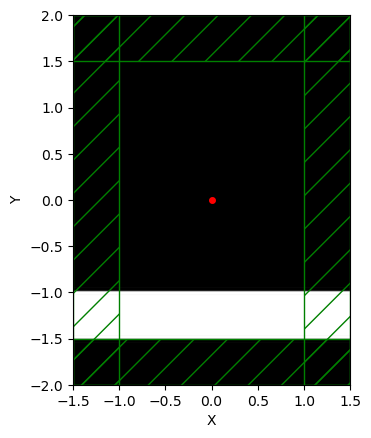

In [185]:
sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 4.00543e-05 s
Working in 2D dimensions.
Computational cell is 3 x 4 x 0 with resolution 50
     block, center = (0,0.25,0)
          size (3,2.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.8224,2.8224,2.8224)
     block, center = (0,-1.25,0)
          size (3,0.5,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (-1e+20,-1e+20,-1e+20)
time for set_epsilon = 0.033036 s
time for set_conductivity = 0.00104594 s
time for set_conductivity = 0.00105405 s
time for set_conductivity = 0.00110698 s
time for set_conductivity = 0.00109005 s
time for set_conductivity = 0.00118113 s
time for set_conductivity = 0.00107718 s
-----------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Meep progress: 35.03/200.0 = 17.5% done in 4.0s, 18.8s to go
on time step 3503 (time=35.03), 0.00114193 s/step
Meep progress: 77.0/200.0 = 38.5% done in 8.0s, 12.9s to go
on time step 7700 (time=77), 0.000964489 s/step
Meep progress: 104.0/200.0 = 52.0% done in 12.7s, 11.7s to go
on time step 10400 (time=104), 0.00172771 s/step
Meep progress: 145.0/200.0 = 72.5% done in 16.8s, 6.4s to go
on time step 14500 (time=145), 0.00100215 s/step
Meep progress: 189.0/200.0 = 94.5% done in 20.9s, 1.2s to go
on time step 18900 (time=189), 0.000923684 s/step
run 0 finished at t = 200.0 (20000 timesteps)


/tmp/ipykernel_239310/928305159.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(fname))


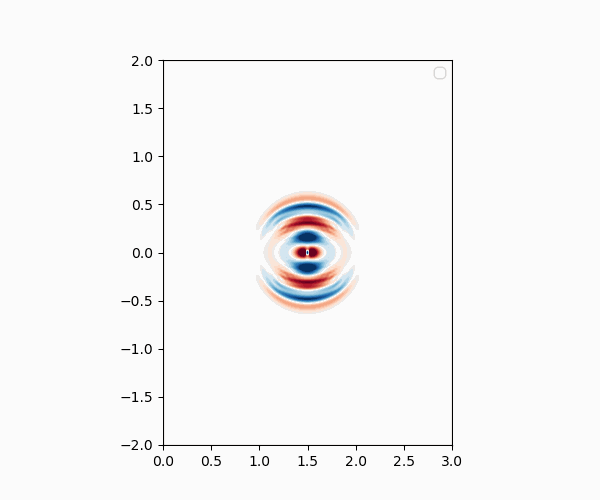

In [186]:
# === 이미지 저장용 디렉토리 생성 ===
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# === 프레임 저장 함수 ===
frame_idx = 0

def save_frame(sim):
    global frame_idx
    field = sim.get_array(component=mp.Ex, center=mp.Vector3(), size=cell_size)

    plt.figure(figsize=(6, 5))
    plt.imshow(field.T, cmap='RdBu', interpolation='spline36', origin='lower',
               vmin=-1, vmax=1, extent=(0, cell_size.x, -cell_size.y/2, cell_size.y/2))

    

    # 범례 (선택사항: 최초 프레임에서만 보기 좋음)
    if frame_idx == 0:
        plt.legend(loc='upper right')

    fname = os.path.join(output_dir, f"frame_{frame_idx:03d}.png")
    plt.savefig(fname)
    plt.close()
    frame_idx += 1



# === 시뮬레이션 실행 ===
sim.run(mp.at_every(1.0, save_frame), until=200)

# === gif 생성 ===
images = []
for i in range(frame_idx):
    fname = os.path.join(output_dir, f"frame_{i:03d}.png")
    images.append(imageio.imread(fname))

gif_path = "wave_propagation.gif"
imageio.mimsave(gif_path, images, fps=5)

# === IPython으로 결과 출력 ===
display(Image(filename=gif_path))